In [1]:
%matplotlib inline
import geopandas as gpd

## Set up background scene

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aus = world[world.name == 'Australia']

## Get the Connections to the databases

In [3]:
from datacube.index import Index
from datacube.drivers.postgres import PostgresDb
from datacube.db_extent import ExtentIndex

extent_db = PostgresDb.create(hostname='agdcdev-db.nci.org.au', database='datacube', 
                              port=6432, username='aj9439')
extent_idx = ExtentIndex(hostname='agdc-db.nci.org.au', database='datacube', port=6432,
                         username='aj9439', extent_index=Index(extent_db))

## Get extent of a month using get_extent_direct() and plot it

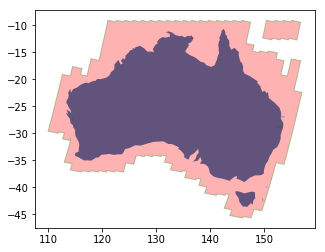

In [4]:
from shapely.geometry import shape
import datetime
import matplotlib.pyplot as plt

dataset_type_ref = extent_idx.get_dataset_type_ref('ls8_nbar_albers')
start = datetime.datetime(year=2017, month=1, day=1)
extent = extent_idx.get_extent_direct(start=start, offset_alias='1M', dataset_type_ref=dataset_type_ref)
ft1 = {'type': 'Feature',
       'geometry': shape(extent)}
gs1 = gpd.GeoDataFrame(ft1)
base = aus.plot()
gs1.plot(ax=base, color='red', alpha=0.3, edgecolor='green')
plt.show(block=True)

## Get extents using get_extent_monthly() and plot it

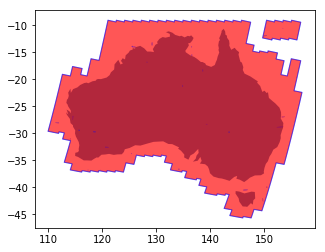

In [5]:
extents = extent_idx.get_extent_monthly(dataset_type_ref=dataset_type_ref, start='2017-01', end='2017-03')
base = aus.plot()
for extent in extents:
    ft1 = {'type': 'Feature',
           'geometry': shape(extent)}
    gs1 = gpd.GeoDataFrame(ft1)
    gs1.plot(ax=base, color='red', alpha=0.3, edgecolor='blue')
plt.show(block=True)

## Get extents using get_extent() and plot it

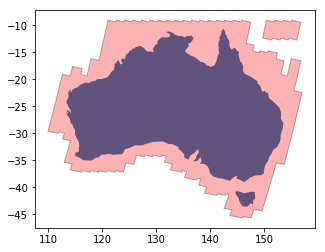

In [6]:
extent = extent_idx.get_extent(product_name='ls8_nbar_albers', start='2017-01', end='2017-03')
ft1 = {'type': 'Feature',
       'geometry': shape(extent)}
gs1 = gpd.GeoDataFrame(ft1)
base = aus.plot()
gs1.plot(ax=base, color='red', alpha=0.3, edgecolor='black')
plt.show(block=True)

## Get bounds using get_bounds() and plot it

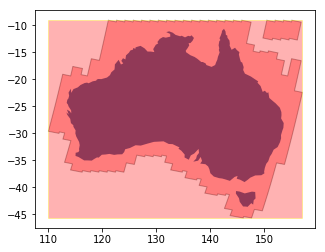

In [7]:
from shapely.geometry import Polygon
import json


def bounds_to_poly(bounds):
    return Polygon([(bounds['left'], bounds['top']), (bounds['left'], bounds['bottom']),
                    (bounds['right'], bounds['bottom']), (bounds['right'], bounds['top']),
                    (bounds['left'], bounds['top'])])


bounds_data = extent_idx.get_bounds('ls8_nbar_albers')
bounds = json.loads(bounds_data['bounds'])
if bounds:
    poly_bounds = bounds_to_poly(bounds)
    ft2 = {'type': 'Feature',
           'geometry': [poly_bounds]}
    gs2 = gpd.GeoDataFrame(ft2)
    base = aus.plot()
    base2 = gs1.plot(ax=base, color='red', alpha=0.3, edgecolor='black')
    gs2.plot(ax=base2, color='red', alpha=0.3, edgecolor='yellow')

# Show the figure
plt.show(block=True)